For the notebook concerned with generating data, see `../../paper_comparison.ipynb`

# 2. Implement recall metric

In [63]:
import json
import pandas as pd

In [64]:
with open("../data/generated_tables_with_high_quality_papers/total_tables_b42af37c-c83f-4cc0-8cc8-e7221c6a8d0f.json") as f:
    table_0_total = json.load(f)

In [67]:
table_0_total.keys()

dict_keys(['input_paper', 'pap_to_tab', 'cc_to_tab', 'multi_scheme', 'ours_table_question', 'ours_table_presupposition', 'ours_question_list', 'ours_final_table'])

In [68]:
table_0_total['pap_to_tab']

{'What is the main focus of the study?': {'paper_1': ['Creation of a subjectively annotated video quality assessment (VQA) database with real-world video sequences for the development and evaluation of objective VQA methods.'],
  'paper_2': ['Construction of a large-scale video quality assessment database and conducting a comprehensive study with crowdsourced subjective video quality scores to advance no-reference video quality prediction.'],
  'paper_3': ['Introduction of a large scale User Generated Content (UGC) dataset for video compression research, along with discussion of challenges for UGC compression and evaluation of no-reference objective quality metrics.'],
  'paper_4': ["Development of a large subjective video quality dataset and corresponding no-reference perceptual video quality assessment models that target 'in-the-wild' user-generated content (UGC)."],
  'paper_5': ['Introduction of a new in-the-wild video quality assessment dataset called KonVid-150k, alongside new ef

In [74]:
# load in the gold table:
with open("../data/arxiv_tables_2308_high_quality/tables.jsonl") as f:
    gold_tables = [json.loads(line) for line in f]

In [75]:
gold_tables[0]

{'tabid': 'b42af37c-c83f-4cc0-8cc8-e7221c6a8d0f',
 'table': {'Dataset': {'9136312': ['KoNViD-1k '],
   '52285071': ['LIVE-VQC '],
   '119309258': ['YouTube-UGC '],
   '227210156': ['LSVQ '],
   '234788066': ['KoNViD-150k '],
   '206592218': ['Sports-1M '],
   '27300853': ['Kinetics-400 ']},
  'Task': {'9136312': ['VQA'],
   '52285071': ['VQA'],
   '119309258': ['VQA'],
   '227210156': ['VQA'],
   '234788066': ['VQA'],
   '206592218': ['classification'],
   '27300853': ['classification']},
  'Size': {'9136312': ['1,200'],
   '52285071': ['585'],
   '119309258': ['1,380'],
   '227210156': ['39,075'],
   '234788066': ['153,841'],
   '206592218': ['1,133,158'],
   '27300853': ['306,245']},
  'Annotations': {'9136312': ['114'],
   '52285071': ['240'],
   '119309258': ['123'],
   '227210156': ['35'],
   '234788066': ['5'],
   '206592218': ['- (auto.)'],
   '27300853': ['3-5']}},
 'row_bib_map': [{'bib_hash_or_arxiv_id': '24b4d04b01098cffe3cb975171aa05132c6a0903',
   'row': 0,
   'corpus_id':

In [86]:
gold_tables[0]

{'tabid': 'b42af37c-c83f-4cc0-8cc8-e7221c6a8d0f',
 'table': {'Dataset': {'9136312': ['KoNViD-1k '],
   '52285071': ['LIVE-VQC '],
   '119309258': ['YouTube-UGC '],
   '227210156': ['LSVQ '],
   '234788066': ['KoNViD-150k '],
   '206592218': ['Sports-1M '],
   '27300853': ['Kinetics-400 ']},
  'Task': {'9136312': ['VQA'],
   '52285071': ['VQA'],
   '119309258': ['VQA'],
   '227210156': ['VQA'],
   '234788066': ['VQA'],
   '206592218': ['classification'],
   '27300853': ['classification']},
  'Size': {'9136312': ['1,200'],
   '52285071': ['585'],
   '119309258': ['1,380'],
   '227210156': ['39,075'],
   '234788066': ['153,841'],
   '206592218': ['1,133,158'],
   '27300853': ['306,245']},
  'Annotations': {'9136312': ['114'],
   '52285071': ['240'],
   '119309258': ['123'],
   '227210156': ['35'],
   '234788066': ['5'],
   '206592218': ['- (auto.)'],
   '27300853': ['3-5']}},
 'row_bib_map': [{'bib_hash_or_arxiv_id': '24b4d04b01098cffe3cb975171aa05132c6a0903',
   'row': 0,
   'corpus_id':

In [101]:
gold_table = gold_tables[0]
table_decontext = {}
for column_name in gold_table["table"]:
    col_context = gold_table["context"]["glossary"].get(column_name)
    if col_context is None:
        table_decontext[column_name] = gold_table["table"][column_name]
        continue

    col_name_and_context =f"{column_name} ( {col_context} )"
    table_decontext[col_name_and_context] = {}
    for corpus_id in gold_table["table"][column_name]:
        # value = ", ".join(gold_table["table"][column_name][corpus_id])
        value = gold_table["table"][column_name][corpus_id][0]
        value_context = gold_table["context"]["glossary"].get(value)
        if value_context is None:
            table_decontext[col_name_and_context][corpus_id] = [f"{col_context}: {value}"]
        else:
            table_decontext[col_name_and_context][corpus_id] = [f"{col_context}: {value} ( {value_context} )"]

gold_table["table_decontext"] = table_decontext

In [102]:
gold_table["table_decontext"]

{'Dataset ( The dataset the paper uses to evaluate its task. )': {'9136312': ['The dataset the paper uses to evaluate its task.: KoNViD-1k '],
  '52285071': ['The dataset the paper uses to evaluate its task.: LIVE-VQC '],
  '119309258': ['The dataset the paper uses to evaluate its task.: YouTube-UGC '],
  '227210156': ['The dataset the paper uses to evaluate its task.: LSVQ '],
  '234788066': ['The dataset the paper uses to evaluate its task.: KoNViD-150k '],
  '206592218': ['The dataset the paper uses to evaluate its task.: Sports-1M '],
  '27300853': ['The dataset the paper uses to evaluate its task.: Kinetics-400 ']},
 'Task ( The task the dataset was designed for. )': {'9136312': ['The task the dataset was designed for.: VQA ( An acronym that stands for video quality assessment. )'],
  '52285071': ['The task the dataset was designed for.: VQA ( An acronym that stands for video quality assessment. )'],
  '119309258': ['The task the dataset was designed for.: VQA ( An acronym that st

In order to evaluate different metrics quickly, I need to have some gold alignments and compare them quickly to the predicted alignments.
I'm concerned about the n-gram metrics not being good enough.

In [107]:
table_0_total['pap_to_tab'].keys()

dict_keys(['What is the main focus of the study?', 'What types of data are presented in the study?', 'What is the methodology used for quality assessment?', 'What are the proposed contributions?'])

In [108]:
table_0_total['cc_to_tab'].keys()

dict_keys(['dataset_size', 'dataset_focus', 'content_diversity', 'data_collection_methodology', 'UGC_focus', 'reference_to_real_world_conditions'])

In [109]:
table_0_total['cc_to_tab']['dataset_size']

{'paper_1': ['1,200 video sequences'],
 'paper_2': ['585 videos'],
 'paper_3': ['1,500 20-sec video clips'],
 'paper_4': ['39,000 videos and 117,000 v-patches'],
 'paper_5': ['153,841 videos, 1,596 densely annotated'],
 'paper_6': ['1 million YouTube videos'],
 'paper_7': ['At least 400 clips for each of the 400 actions']}

In [104]:
table_0_total['pap_to_tab']['What is the main focus of the study?']

{'paper_1': ['Creation of a subjectively annotated video quality assessment (VQA) database with real-world video sequences for the development and evaluation of objective VQA methods.'],
 'paper_2': ['Construction of a large-scale video quality assessment database and conducting a comprehensive study with crowdsourced subjective video quality scores to advance no-reference video quality prediction.'],
 'paper_3': ['Introduction of a large scale User Generated Content (UGC) dataset for video compression research, along with discussion of challenges for UGC compression and evaluation of no-reference objective quality metrics.'],
 'paper_4': ["Development of a large subjective video quality dataset and corresponding no-reference perceptual video quality assessment models that target 'in-the-wild' user-generated content (UGC)."],
 'paper_5': ['Introduction of a new in-the-wild video quality assessment dataset called KonVid-150k, alongside new efficient video quality assessment approaches b

`pap_to_tab`:
- Dataset - 'What types of data are presented in the study'


In [105]:
from sentence_transformers import SentenceTransformer, util

In [106]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [112]:
embeddings_gold = model.encode(
    [" ".join(gold_table["table_decontext"][c][paper_id]) for c in gold_table["table_decontext"] for paper_id in gold_table["table_decontext"][c]]
)

In [114]:
embeddings_pred_pap_to_tab = model.encode(
    [" ".join(table_0_total["pap_to_tab"][c][paper_id]) for c in table_0_total["pap_to_tab"] for paper_id in table_0_total["pap_to_tab"][c]]
)

In [147]:
embeddings_pred_cc_to_tab = model.encode(
    [" ".join(table_0_total["cc_to_tab"][c][paper_id]) for c in table_0_total["cc_to_tab"] for paper_id in table_0_total["cc_to_tab"][c]]
)

In [135]:
len(table_0_total["pap_to_tab"])

4

In [117]:
import numpy as np

In [116]:
embeddings_gold.shape

(28, 384)

In [115]:
embeddings_pred_pap_to_tab.shape

(28, 384)

In [121]:
import matplotlib.pyplot as plt

In [133]:
np.linalg.norm(embeddings_gold, axis=1)

array([0.9999999 , 1.        , 1.        , 0.99999994, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999994, 0.99999994, 1.0000001 ,
       0.99999994, 1.        , 1.        , 0.99999994, 1.        ,
       0.99999994, 1.        , 0.99999994, 0.99999994, 0.99999994,
       1.        , 1.        , 1.        ], dtype=float32)

In [120]:

sim_mat = np.matmul(embeddings_gold, embeddings_pred_pap_to_tab.T)

In [127]:
sim_mat_cosine = util.cos_sim(embeddings_gold, embeddings_pred_pap_to_tab)

In [131]:
np.allclose(sim_mat_cosine, sim_mat)

True

In [166]:
# next, iterate through the num_papers x num_papers blocks to aggregate similarities among papers
sim_mat_cosine = util.cos_sim(embeddings_gold, embeddings_pred_pap_to_tab)
num_papers = len(gold_table['row_bib_map'])
column_scores = np.zeros((
    len(gold_table["table_decontext"]), len(table_0_total["pap_to_tab"])
))

for i in range(0, len(sim_mat_cosine), num_papers):
    for j in range(0, len(sim_mat_cosine[i]), num_papers):
        column_scores[i//num_papers][j // num_papers] = np.mean(
            sim_mat_cosine[i:i + num_papers, j:j + num_papers].numpy()
        )
        
np.max(column_scores, axis=1)

array([0.35967594, 0.51227462, 0.60144138, 0.5360809 ])

In [150]:
sim_mat_cosine = util.cos_sim(embeddings_gold, embeddings_pred_cc_to_tab)

# next, iterate through the num_papers x num_papers blocks to aggregate similarities among papers
num_papers = len(gold_table['row_bib_map'])
column_scores = np.zeros((
    len(gold_table["table_decontext"]), len(table_0_total["cc_to_tab"])
))

for i in range(0, len(sim_mat_cosine), num_papers):
    for j in range(0, len(sim_mat_cosine[i]), num_papers):
        column_scores[i//num_papers][j // num_papers] = np.mean(
            sim_mat_cosine[i:i + num_papers, j:j + num_papers].numpy()
        )

# column_scores[0] = the similarity scores for the first column of the gold table

In [164]:
threshold = 0.4
np.max(column_scores, axis=1)

array([0.30438793, 0.43206748, 0.56763244, 0.53662711])

In [186]:
def get_alignment(gold_table, pred_table, column_scores, threshold):
    alignment = {}
    for gold_col_i, gold_col_name in enumerate(gold_table):
        alignment[(gold_col_name, gold_col_i)] = []
        for pred_col_i, pred_col_name in enumerate(pred_table):
            if column_scores[gold_col_i, pred_col_i] > threshold:
                alignment[(gold_col_name, gold_col_i)].append((pred_col_name, pred_col_i))

    return alignment, column_scores

def get_alignment_values(gold_table, pred_table, threshold):
    embeddings_gold = model.encode(
        [" ".join(gold_table[c][paper_id]) for c in gold_table for paper_id in gold_table[c]]
    )
    embeddings_pred = model.encode(
        [" ".join(pred_table[c][paper_id]) for c in pred_table for paper_id in pred_table[c]]
    )
    
    sim_mat_cosine = util.cos_sim(embeddings_gold, embeddings_pred)

    # next, iterate through the num_papers x num_papers blocks to aggregate similarities among papers
    num_papers = len(list(gold_table.values())[0])
    column_scores = np.zeros((
        len(gold_table), len(pred_table)
    ))
    
    for i in range(0, len(sim_mat_cosine), num_papers):
        for j in range(0, len(sim_mat_cosine[i]), num_papers):
            column_scores[i//num_papers][j // num_papers] = np.mean(
                sim_mat_cosine[i:i + num_papers, j:j + num_papers].numpy()
            )

    # calculate the alignment
    return get_alignment(gold_table, pred_table, column_scores, threshold)

def get_alignment_columns(gold_table, pred_table, threshold):
    embeddings_gold = model.encode(
        list(gold_table.keys())
    )
    embeddings_pred = model.encode(
        list(pred_table.keys())
    )
    
    sim_mat_cosine = util.cos_sim(embeddings_gold, embeddings_pred)

    # calculate the alignment
    return get_alignment(gold_table, pred_table, sim_mat_cosine, threshold)

In [184]:
alignment_cc_to_tab, column_scores_cc_to_tab = get_alignment_values(gold_table["table_decontext"], table_0_total["cc_to_tab"], 0.5)

In [182]:
alignment_cc_to_tab

{('Dataset ( The dataset the paper uses to evaluate its task. )', 0): [],
 ('Task ( The task the dataset was designed for. )', 1): [],
 ('Size ( The number of annotated videos in the dataset )',
  2): [('dataset_size', 0)],
 ('Annotations ( The number of annotations per video. )',
  3): [('dataset_size', 0)]}

In [190]:
alignment_cc_to_tab_cols, column_scores_cc_to_tab_cols = get_alignment_columns(gold_table["table_decontext"], table_0_total["cc_to_tab"], 0.45)

In [191]:
alignment_cc_to_tab_cols

{('Dataset ( The dataset the paper uses to evaluate its task. )', 0): [],
 ('Task ( The task the dataset was designed for. )', 1): [],
 ('Size ( The number of annotated videos in the dataset )',
  2): [('dataset_size', 0)],
 ('Annotations ( The number of annotations per video. )', 3): []}

In [189]:
column_scores_cc_to_tab_cols

tensor([[ 0.4252,  0.4232,  0.2144,  0.3453,  0.1487,  0.1917],
        [ 0.2810,  0.3959,  0.1755,  0.3202,  0.1592,  0.1647],
        [ 0.4677,  0.2154,  0.2187,  0.1279,  0.0396, -0.0273],
        [ 0.1312,  0.1218,  0.2663,  0.0354,  0.1214,  0.0252]])

In [192]:
alignment_pap_to_tab, column_scores_pap_to_tab = get_alignment_values(gold_table["table_decontext"], table_0_total["pap_to_tab"], 0.5)

In [193]:
alignment_pap_to_tab

{('Dataset ( The dataset the paper uses to evaluate its task. )', 0): [],
 ('Task ( The task the dataset was designed for. )',
  1): [('What types of data are presented in the study?', 1)],
 ('Size ( The number of annotated videos in the dataset )',
  2): [('What types of data are presented in the study?', 1)],
 ('Annotations ( The number of annotations per video. )',
  3): [('What types of data are presented in the study?', 1)]}

In [194]:
column_scores_pap_to_tab

array([[0.29249093, 0.35967594, 0.27512306, 0.3139298 ],
       [0.48544809, 0.51227462, 0.38085705, 0.49473956],
       [0.48843396, 0.60144138, 0.2822994 , 0.44557634],
       [0.43911833, 0.5360809 , 0.27533525, 0.38838932]])

In [195]:
table_0_total["pap_to_tab"]['What types of data are presented in the study?']

{'paper_1': ['Subjectively annotated VQA database with 1,200 video sequences representing a wide variety of content and distortions.'],
 'paper_2': ['Video quality assessment database containing 585 videos with a large number of subjective quality scores collected via crowdsourcing.'],
 'paper_3': ['Large scale UGC dataset with 1500 20-second video clips covering various categories and features like HDR, plus evaluation with three no-reference metrics.'],
 'paper_4': ['Extensive video quality dataset with 39,000 distorted videos, 117,000 video patches, and 5.5 million human perceptual quality annotations.'],
 'paper_5': ['VQA dataset called KonVid-150k with over 153,841 videos and multiple quality ratings, and 1,596 videos with extensive subjective assessment.'],
 'paper_6': ['New dataset of 1 million YouTube videos across 487 classes for the evaluation of CNNs on large-scale video classification.'],
 'paper_7': ['Kinetics human action video dataset comprising over 400 human action cla

There are other things we could try, but we need to find the context for all of the tables. This requires continuing what I was doing last week:
- I need to extract the full texts
- Would be nice to do get some gold alignments too

In [169]:
len(list(gold_table["table_decontext"].values())[0])

7

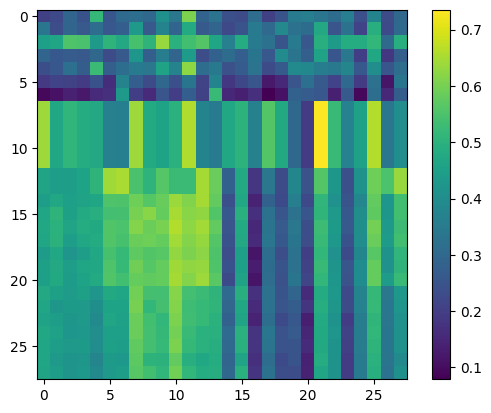

In [128]:
plt.imshow(sim_mat_cosine)
plt.colorbar()

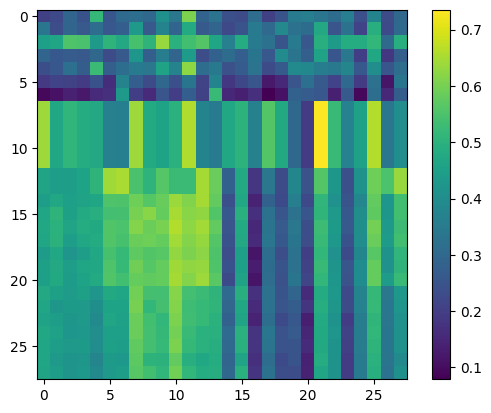

In [125]:
plt.imshow(sim_mat)
plt.colorbar()

In [113]:
[" ".join(table_0_total["pap_to_tab"][c][paper_id]) for c in table_0_total["pap_to_tab"] for paper_id in table_0_total["pap_to_tab"][c]]

['Creation of a subjectively annotated video quality assessment (VQA) database with real-world video sequences for the development and evaluation of objective VQA methods.',
 'Construction of a large-scale video quality assessment database and conducting a comprehensive study with crowdsourced subjective video quality scores to advance no-reference video quality prediction.',
 'Introduction of a large scale User Generated Content (UGC) dataset for video compression research, along with discussion of challenges for UGC compression and evaluation of no-reference objective quality metrics.',
 "Development of a large subjective video quality dataset and corresponding no-reference perceptual video quality assessment models that target 'in-the-wild' user-generated content (UGC).",
 'Introduction of a new in-the-wild video quality assessment dataset called KonVid-150k, alongside new efficient video quality assessment approaches based on multi-level spatially pooled features.',
 'Empirical eva

In [77]:
gold_tables[0]["context"] = {
    "caption": "Comparisons of public VQA and video classification datasets. Note that obtaining reliable quality annotations requires massive subjective annotations per video, which limits the size of VQA datasets.",
    "mention_paragraphs": ["DNN-based VQA methods are hindered by the limited scale of existing VQA datasets. As demonstrated in Tab. 1, public VQA datasets are significantly smaller in size when compared to video classification datasets (Karpathy et al., 2014; Kay et al., 2017). The primary reason for this discrepancy is the prevalent use of crowdsourcing to annotate subjective video quality (Chen et al., 2010; Hoßfeld et al., 2014; Shahid et al., 2014; Chen et al., 2015), which is a time-consuming yet indispensable process in eliminating randomness and enhancing consistency. For example, the KoNViD-1k dataset (Hosu et al., 2017) requires an average of 114 subjective scores to produce a valid label. Recently, there have been attempts to scale up VQA datasets (Ying et al., 2021; Götz-Hahn et al., 2021). However, these efforts often sacrifice the annotation quality, as they reduce the average number of annotations per video in order to improve efficiency. For instance, an experiment conducted on the KoNViD-150k dataset (Götz-Hahn et al., 2021) revealed that the correlation coefficient of SRCC between randomly sampled five annotations is 0.8, while it is 0.9 for fifty annotations. Thus, in this paper, we primarily focus on enhancing the performance of VQA under the circumstance of limited availability of high-quality annotated data."],
    "glossary": {
        "Dataset": "The dataset the paper uses to evaluate its task.",
        "Task": "The task the dataset was designed for.",
        "VQA": "An acronym that stands for video quality assessment.",
        "classification": "The video classification task.",
        "Annotations": "The number of annotations per video.",
        "Size": "The number of annotated videos in the dataset",
    }
}

gold_tables[1]["context"] = {
    "caption": "Physical adversarial attacks against Semantic Segmentation tasks. Attacker's knowledge, Robustness technique, Stealthiness technique, Physical test type, and Space.",
    "mention_paragraphs": ["Table XII presents a comprehensive comparison of various adversarial attack methods in the semantic segmentation task. It provides an overview of their attack goals, patch placement strategies, consideration of changing viewpoints, testing in the physical domain, and transferability to other models. Table XIII offers detailed information on adversarial attacks, including the attacker’s knowledge level, robustness techniques, stealthiness techniques, physical test types, and space of operation. Table XIV provides information on the datasets used, the evaluated networks, and the links to open-source code for the experiments conducted in the semantic segmentation task."],
    "glossary": {
        "IPatch": "An adversarial attack that targets a particular region in an image by inserting a adversarially optimized patch.",
        # "SSAttack": "",
        "Attacker's Knowledge": "The knowledge required by the attacker. Can be one of White-box, Black-box or Grey-box",
        "White-box": "refer to adversarial attacks where the attacker possesses complete knowledge of the training and testing data used to train the victim model, as well as the architecture and parameters of the target model.",
        "Robustness Technique": "Technique for building systems that are robust to this attack",
        "EOT": "Expectation of Transformation. for adversarial attacks, which takes potential transformations in the real world into account during the optimization, resulting in better robustness. EOT adds random distortions in the optimization to make the perturbation more robust.",
        "Stealthiness Technique": "Techniques for evading detection that the attack was used.",
        "Static": "Attacks that do not change once inserted into the scene.",
        "Space": "Whether the attack takes place in two dimensions (eg like a sticker) or three (eg an object)",
        "2D": "The attack takes place in two dimensions", 
    }
}

gold_tables[2]["context"] = {
    "caption": "The comparison of existing data augmentation methods powered by LLMs for training retrieval models.",
    "mention_paragraphs": ["Additionally, to highlight the similarities and differences among the corresponding methods, we present a comparative result in Table III. It compares the aforementioned methods from various perspectives, including the number of examples, the generator employed, the type of synthetic data produced, the method applied to filter synthetic data, and whether LLMs are fine-tuned. This table serves to facilitate a clearer understanding of the landscape of these methods."],
    "glossary": {
        "Methods": "The name of the data augmentation method used by the paper",
        "# Examples": {"text": "The number of in-context examples used in the prompt the paper's method proposes.", "notes": "guess"},
        "Generator": "The generation model used for data augmentation",
        "Synthetic data": "The type of synthetic data produced by the method in the paper.",
        "Relevant query": "The data augmentation mehtod produces synthetic queries that are relevant to a set of documents.",
        "Soft relevance labels": {"text": "In some downstream tasks of retrieval, such as question-answering, the collection of questions is also sufficient. However, the relevance labels connecting these questions with the passages of supporting evidence are very limited. In this context, leveraging the capability of LLMs for relevance label generation is a promising approach that can augment the training corpus for retrievers. LLMs produce the generation probabilities of the question conditioned on these top passages. After a normalization process, these probabilities serve as soft relevance labels for the training of the retriever.", "notes": "quote"},
        "Filter Method": "How the synthetic data produced by the method in the paper is filtered to produce high quality data.",
        "Generation probability": {"text": "The probability of the synthetic query given the documents.", "notes": "guess"},
        "Round-trip filtering": "First a retriever is fine-tuned on generated samples and then it is used to filter the samples.",
        "LLMs' tuning": "Whether the LLMs are finetuned, and what method is used if they are.",
        "Fixed": {"text": "the LLMs are not fintetuned", "notes": "guess"},
        "Soft Prompt tuning": "only the prompts' embedding layer is optimized during the training process.",
    }
}

gold_tables[3]["context"] = {
    "caption": "The comparison of retrievers that leverage LLMs as the foundation.",
    "mention_paragraphs": ["To provide a comprehensive understanding of this topic, Table 4 summarizes the common and unique characteristics of the LLM-based retrievers discussed above."],
    "glossary": {
        "Methods": "The method introduced by the paper",
        "Backbone": {"text": "The model that the LLM-based retriever is built off of", "notes": "guess"},
        "Architecture": "The architecture of the model used for the LLM-based retriever.",
        "Encoder-based": "LLMs, like the T5-family of models, are used to embed passages which are then placed in an index.",
        "Generative": "LLMs generate document identifiers or URLs directly rather than using the 'index-retrieval-rank' paradigm.",
        "LLM's tuning": "How LLM's need to be tuned for the paper's method.",
        "Training from scratch": {"text": "The model has to be trained from scratch", "notes": "guess"},
        "Fine-tuning": {"text": "The model has to be fine-tuned", "notes": "guess"},
        "Fine-tuning & Prompting": {"text": "The model has to be fine-tuned and prompted in a specific way to perform retrieval", "notes": "guess"},
        "Prompting": {"text": "The model does not have to be fine-tuned and can instead just be prompted", "notes": "guess"},
    }
}

# 1. Analyzing High Quality Tables

In [58]:
import json
import pandas as pd

with open("../data/generated_tables_with_high_quality_papers/total_tables_b42af37c-c83f-4cc0-8cc8-e7221c6a8d0f.json") as f:
    table_0_total = json.load(f)

In [5]:
with open("../data/generated_tables_with_high_quality_papers/baseline_table_b42af37c-c83f-4cc0-8cc8-e7221c6a8d0f.json") as f:
    table_0_baseline = json.load(f)

In [9]:
with open("../data/generated_tables_with_high_quality_papers/ours_table_b42af37c-c83f-4cc0-8cc8-e7221c6a8d0f.json") as f:
    table_0_ours = json.load(f)

In [27]:
# gold table
with open("../data/arxiv_tables_2308_high_quality/tables.jsonl") as f:
    tables_gold = [json.loads(line.strip()) for line in f]

In [30]:
tables_gold[0]['table'].keys()

dict_keys(['Dataset', 'Task', 'Size', 'Annotations'])

In [40]:
pd.DataFrame(tables_gold[0]['table'])

,Dataset,Task,Size,Annotations
9136312,[KoNViD-1k ],[VQA],"[1,200]",[114]
52285071,[LIVE-VQC ],[VQA],[585],[240]
119309258,[YouTube-UGC ],[VQA],"[1,380]",[123]
227210156,[LSVQ ],[VQA],"[39,075]",[35]
234788066,[KoNViD-150k ],[VQA],"[153,841]",[5]
206592218,[Sports-1M ],[classification],"[1,133,158]",[- (auto.)]
27300853,[Kinetics-400 ],[classification],"[306,245]",[3-5]


In [62]:
pd.DataFrame(table_0_total['ours_table_question'])



,question_0,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,question_11,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19
paper_0,The paper addresses the lack of large VQA databases with real-world video sequences and subjective MOS.,,"VQA is video quality assessment, and a large, diverse database aids in developing and evaluating objective VQA methods.",,,,,,,,,"The issue is the lack of large, diverse datasets with real-world distortions for video quality assessment.",,,,,,,,
paper_1,The paper addresses the problem of no-reference video quality models' poor performance on diverse real-world video data.,,,,,,,,,Performance measured by comparing no-reference video quality predictors on a new large-scale video quality database with crowdsourced scores.,,The issue is current no-reference video quality models' inability to handle diverse video impairments.,"No-reference video quality models struggle with diverse, authentic, commingled distortions in real-world videos.",,The paper proposes a large-scale video quality database to enhance no-reference video quality models.,,The paper addresses the inadequacy of existing databases to represent real-world video diversity and authentic distortions.,The focus is on improving no-reference video quality prediction models for diverse real-world conditions.,The paper addresses shortcomings in current no-reference video quality models due to limited databases.,
paper_2,The paper tackles the shortcomings of traditional metrics for UGC video compression and quality assessment.,The approach is the introduction of a large scale UGC dataset to improve video compression research.,,,,,The paper focuses on the issue of assessing and improving compression and quality metrics for UGC videos.,,,,,,No-reference video quality models struggle with User Generated Content (UGC) that is non-pristine.,The paper considers BD-Rate and PSNR inadequate for UGC video compression and quality assessment.,The paper proposes using no-reference objective quality metrics to assess UGC video quality for compression.,The paper introduces no-reference objective quality metrics for evaluating UGC video compression and quality.,The paper addresses shortcomings of traditional metrics like BD-Rate and PSNR on non-pristine originals in UGC.,,,
paper_3,,The approach is a ‘local-to-global’ region-based NR VQA architecture and spatio-temporal quality mapping engine.,"VQA is Video Quality Assessment; large real-world database with MOS needed for accurate ""in-the-wild"" content quality prediction.",,The paper used subjective annotations to create a large video quality dataset and developed NR-VQA models.,,,,,Performance is measured by a subjective video quality dataset with human perceptual quality annotations.,,The paper discusses the limited prediction capabilities of current no-reference models on real-world user-generated content video quality.,No-reference video quality models struggle with real-world user-generated content (UGC) video data.,,,The paper introduces a local-to-global region-based NR VQA architecture and a space-time video quality mapping engine.,,The paper focuses on improving no-reference perceptual video quality assessment for user-generated content.,The paper addresses the shortcomings in no-reference perceptual video quality assessment for user-generated content.,The main problem addressed is the inefficient no-reference perceptual video quality assessment for user-generated content.
paper_4,"The paper addresses the lack of large, diverse datasets for no-reference video quality assessment in-the-wild.","The approach proposed is a new dataset, KonVid-150k, and efficient VQA methods using multi-level spatially pooled deep-features (MLSP).","VQA is Video Quality Assessment, and a large, diverse dataset with subjective Mean Opinion Scores (MOS) aids in developing robust models for real-world applications."

In [50]:
table_0_baseline['multi_scheme']["What is the number of human perceptual quality annotations provided in the dataset mentioned in the 'Patch-VQ: ‘Patching Up’ the Video Quality Problem' paper?"]

{'paper_0': '',
 'paper_1': "The 'Patch-VQ: ‘Patching Up’ the Video Quality Problem' paper does not provide details about the number of human perceptual quality annotations within the dataset it discusses.",
 'paper_2': '',
 'paper_3': "The dataset in the 'Patch-VQ: ‘Patching Up’ the Video Quality Problem' paper consists of a total of 5.5M perceptual quality judgments on videos and v-patches from almost 6,300 subjects.",
 'paper_4': '5.5M',
 'paper_5': "The 'Patch-VQ: ‘Patching Up’ the Video Quality Problem' paper states that the final dataset consists of a total of 5.5M perceptual quality judgments on videos and v-patches.",
 'paper_6': 'A total of 5.5 million perceptual quality judgments on videos and v-patches from almost 6,300 subjects'}

In [57]:
df = pd.DataFrame({k: v for k, v in table_0_total['multi_scheme'].items() if "_" not in k}); df[df.columns[6:12]]

,How are the videos in the UGC dataset sampled?,What is the purpose of the PVQ Mapper mentioned in the paper?,What are the shortcomings of traditional reference-based metrics on UGC according to the paper?,What is the performance difference between spatio-temporal networks and single-frame models reported in the paper?,On what measures is this study the largest video quality assessment study ever conducted?,To what extent does the LIVE-VQC database represent real world videos?
paper_0,,,,,,
paper_1,,,,,"This study is the largest video quality assessment study ever conducted in terms of the number of unique contents, capture devices, distortion types and combinations of distortions, study participants, and recorded subjective scores.","The LIVE-VQC database is designed to represent real world videos that contain very different kinds of content obtained under highly diverse imaging conditions and are subject to authentic, often commingled distortions that are impossible to simulate."
paper_2,,,,,,
paper_3,"For the 'YouTube UGC Dataset for Video Compression Research', videos in the UGC dataset are sampled using a novel sampling method based on features extracted from encoding.","The purpose of the PVQ Mapper mentioned in the 'Patch-VQ: ‘Patching Up’ the Video Quality Problem' paper is to predict first-of-a-kind space-time maps of video quality by learning global-to-local quality relationships, which helps localize, visualize, and act on video distortions.",The shortcomings of traditional reference-based metrics on UGC according to the 'YouTube UGC Dataset for Video Compression Research' paper include their significant drop in accuracy when applied to non-pristine originals which make up the majority of UGC.,"The 'Patch-VQ: ‘Patching Up’ the Video Quality Problem' paper suggests that their new model achieves top performance on the new database as well as on smaller 'in-the-wild' databases without fine-tuning. However, specific performance difference values between spatio-temporal networks and single-frame models are not provided in the given introduction.","The 'Large-Scale Study of Perceptual Video Quality’ study is the largest video quality assessment study ever conducted along several key dimensions: number of unique contents, capture devices, distortion types and combinations of distortions, study participants, and recorded subjective scores.","The LIVE-VQC database represents real-world videos to a considerable extent as it contains 585 videos of unique content, captured by a large number of users, with a wide range of levels of complex, authentic distortions."
paper_4,,The PVQ Mapper is a prediction model that predicts first-of-a-kind space-time maps of video quality by learning global-to-local quality relationships.,,,"Number of unique contents, capture devices, distortion types and combinations of distortions, study participants, and recorded subjective scores.",
paper_5,"In the 'YouTube UGC Dataset for Video Compression Research' paper, the videos in the dataset are sampled using a novel method based on features extracted from encoding.","The purpose of the PVQ Mapper, as mentioned in the 'Patch-VQ: ‘Patching Up’ the Video Quality Problem' paper, is to predict first-of-a-kind space-time maps of video quality by learning global-to-local quality relationships, helping to localize, visualize, and act on video distortions.","The 'YouTube UGC Dataset for Video Compression Research' paper and 'Patch-VQ: ‘Patching Up’ the Video Quality Problem' paper both address the shortcomings of traditional reference-based metrics on UGC, which include their decreased accuracy when applied to non-pristine originals that are typical of UGC, as they were designed for pristine originals.","The 'Patch-VQ: ‘Patching Up’ the Video Quality Problem' paper seems to imply that spatio-temporal networks have better performance due to their ability to capture both spatial and temporal impairments, unlike single-frame models which may not capture diverse 

In [32]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(table_0_total['pap_to_tab'])

,What is the main focus of the study?,What types of data are presented in the study?,What is the methodology used for quality assessment?,What are the proposed contributions?
paper_1,[Creation of a subjectively annotated video quality assessment (VQA) database with real-world video sequences for the development and evaluation of objective VQA methods.],"[Subjectively annotated VQA database with 1,200 video sequences representing a wide variety of content and distortions.]",[Subjective mean opinion scores (MOS) are used for video quality rating.],[A new large dataset of video sequences aimed at helping development and evaluation of general-purpose VQA methods.]
paper_2,[Construction of a large-scale video quality assessment database and conducting a comprehensive study with crowdsourced subjective video quality scores to advance no-reference video quality prediction.],[Video quality assessment database containing 585 videos with a large number of subjective quality scores collected via crowdsourcing.],[Crowdsourced subjective ratings were used for the quality assessment of video.],[A large-scale video quality assessment database and comprehensive study to aid in the improvement of NR video quality predictors.]
paper_3,"[Introduction of a large scale User Generated Content (UGC) dataset for video compression research, along with discussion of challenges for UGC compression and evaluation of no-reference objective quality metrics.]","[Large scale UGC dataset with 1500 20-second video clips covering various categories and features like HDR, plus evaluation with three no-reference metrics.]","[Evaluation is based on no-reference objective quality metrics such as Noise, Banding, and SLEEQ.]","[Introduction of a UGC dataset for research, novel sampling method, and discussion of challenges and shortcomings for UGC compression and quality evaluation.]"
paper_4,[Development of a large subjective video quality dataset and corresponding no-reference perceptual video quality assessment models that target 'in-the-wild' user-generated content (UGC).],"[Extensive video quality dataset with 39,000 distorted videos, 117,000 video patches, and 5.5 million human perceptual quality annotations.]",[Creation of a region-based no-reference VQA architecture and a space-time video quality mapping engine for quality prediction and localization.],[Largest subjective video quality dataset for ‘in-the-wild’ distorted UGC videos and innovative models for local-to-global video quality assessment.]
paper_5,"[Introduction of a new in-the-wild video quality assessment dataset called KonVid-150k, alongside new efficient video quality assessment approaches based on multi-level spatially pooled features.]","[VQA dataset called KonVid-150k with over 153,841 videos and multiple quality ratings, and 1,596 videos with extensive subjective assessment.]",[Proposed new efficient VQA approaches relying on multi-level spatially pooled deep-features (MLSP) for no-reference quality assessment.],"[Introduction of a new VQA dataset that is larger and more diverse compared to existing datasets, as well as efficient VQA models suitable for in-the-wild videos.]"
paper_6,"[Empirical evaluation of Convolutional Neural Networks (CNNs) on large-scale video classification using a dataset of 1 million YouTube videos, and exploration of methods to extend CNNs in the time domain.]",[New dataset of 1 million YouTube videos across 487 classes for the evaluation of CNNs on large-scale video classification.],"[Empirical evaluation of CNNs, comparison with feature-based baselines, and studying model's performance improvements on UCF-101 dataset.]",[Extensive evaluation of CNNs on large-scale video classification and suggestions on approaches to extend the spatio-temporal connectivity of CNNs.]
paper_7,"[Description of the Kinetics human action video dataset for human action classification, containing 400 classes with an analysis of dataset imbalance and classifier bias.]","[Kinetics human act

In [33]:
pd.DataFrame(table_0_baseline['pap_to_tab'])

,What is the main focus of the research?,What type of dataset is introduced or used?,How were the video sequences obtained for the dataset?,What are the applications of the proposed method or dataset?,What is the scale of the dataset in terms of video count and variety?
paper_1,[Creating a large VQA database of real-world video sequences with subjective mean opinion scores to benefit the development and evaluation of VQA methods.],"[The KoNViD-1k database consisting of 1,200 public-domain video sequences with subjective annotations.]","[Fairly sampled from a large public video dataset, YFCC100m.]","[Training and validation of general-purpose VQA methods, especially useful for deep learning approaches.]","[1,200 video sequences depicting a wide variety of content and authentic distortions.]"
paper_2,[Conducting a large-scale study of perceptual video quality and constructing a large video quality assessment database to advance NR video quality prediction.],[The LIVE Video Quality Challenge Database (LIVE-VQC) containing 585 videos with a large number of subjective scores collected via crowdsourcing.],"[Captured by a large number of users, with wide ranges of levels of complex, authentic distortions.]",[Advancing no-reference video quality prediction by providing a resource for evaluating video quality predictors.],"[585 videos of unique content, captured by numerous users and a wide range of authentically distorted videos.]"
paper_3,"[Introducing a large scale UGC dataset for video compression and quality assessment research, discussing its challenges, and evaluating UGC quality by no-reference metrics.]","[A large scale UGC dataset (1500 20 sec video clips) sampled from millions of YouTube videos, covering popular categories and features like HDR.]",[Sampled from millions of YouTube videos through a novel sampling method based on features extracted from encoding.],[Improving video compression and quality assessment in the context of UGC by providing a dataset representative of real-world conditions.],[1500 video clips representing popular categories and various features such as HDR.]
paper_4,[Creating the largest subjective video quality dataset and developing region-based NR VQA models to improve the prediction of video quality on UGC.],"[A subjective video quality dataset containing 39,000 real-world distorted videos and 117,000 'v-patches', along with 5.5M human quality annotations.]",[Collected real-world UGC video data and space-time localized video patches.],"[Improving NR perceptual VQA algorithms for social and streaming media applications, localization, and visualization of perceptual distortions.]","[A dataset containing 39,000 videos and 117,000 video patches for localized quality assessment.]"
paper_5,[Introducing a new VQA dataset 'KonVid-150k' for videos in-the-wild and proposing new efficient VQA approaches with multi-level spatially pooled deep-features.],"[KonVid-150k, a dataset of 153,841 videos having five quality ratings each, and 1,596 videos with a minimum of 89 ratings each.]",[Automatically gathered from the web and coarsely annotated.],[Providing a basis for developing and benchmarking VQA methods suited for videos in-the-wild.],"[153,841 videos for coarsely annotated set, and 1,596 videos for densely annotated set.]"
paper_6,[Providing an extensive empirical evaluation of CNNs on a new large-scale video classification dataset of YouTube videos and exploring different architectures.],[A new dataset of 1 million YouTube videos belonging to 487 classes for large-scale video classification.],[Automatically extracted from YouTube using video metadata.],[Evaluating the performance of CNN architectures for large-scale video classification tasks and the extraction of spatio-temporal features.],"[1 million YouTube videos belonging to 487 classes, providing significant variety in terms of content.]"
paper_7,[Describing the DeepMind Kinetics human action video dataset and analyzing the classification performance

In [34]:
pd.DataFrame(table_0_total['cc_to_tab'])

,dataset_size,dataset_focus,content_diversity,data_collection_methodology,UGC_focus,reference_to_real_world_conditions
paper_1,"[1,200 video sequences]",[No-reference video quality assessment],[Variety of content and authentic distortions],[Subjectively annotated],[No specific focus on UGC],['In the wild' authentic distortions]
paper_2,[585 videos],[No-reference video quality assessment],"[Unique contents, capture devices, distortion types]","[Crowdsourcing with 4776 participants, 205000 opinion scores]",[No specific focus on UGC],[Real-world video data with authentic distortions]
paper_3,"[1,500 20-sec video clips]",[Compression and quality assessment of UGC],"[Popular categories like Gaming, Sports, HDR features]",[Sampling based on features from encoding],[UGC compression and quality evaluation],[Non-pristine originals from YouTube]
paper_4,"[39,000 videos and 117,000 v-patches]",[No-reference perceptual video quality assessment],[Real-world distorted videos and local video patches],[5.5M human perceptual quality annotations],[Emphasis on UGC video data],[Real-world UGC video data]
paper_5,"[153,841 videos, 1,596 densely annotated]",[No-reference video quality assessment of in-the-wild videos],"[Substantially larger and diverse, in-the-wild videos]","[Coarsely annotated with five quality ratings each, some with at least 89 ratings]",[Focus on in-the-wild UGC],[In-the-wild videos]
paper_6,[1 million YouTube videos],[Video classification with CNNs],[Large-scale video classification across 487 classes],[Empirical evaluation on a new dataset],"[Videos from YouTube, UGC mentioned but not the focus]",[Use of YouTube videos implies real-world relevance]
paper_7,[At least 400 clips for each of the 400 actions],[Human action video dataset],"[400 human action classes, broad range]",[Detailed collection description and baseline figures],"[YouTube videos are source, but focus is on human actions rather than UGC as a category]","[YouTube videos, but real-world conditions not explicitly stated]"


In [35]:
pd.DataFrame(table_0_baseline['cc_to_tab'])

,Focus of VQA Database,Methodology for VQA,Dataset Contribution,Content and Distortion Types,Model or Metric Proposed,Use of Authentic or User-Generated Content
paper_1,"['in the wild' videos, a wide variety of content and authentic distortions]",[Subjective VQA database creation],"[1,200 public-domain video sequences with subjective mean opinion scores (MOS)]",[Authentic distortions],"[None, database for development of future models]",[Yes]
paper_2,"[Unique content and wide range of video impairments including complex, authentic distortions]",[Subjective VQA database with crowdsourced opinion scores and a study of leading NR video quality predictors],"[Large-scale VQA database with 585 videos and over 205,000 opinion scores]","[Complex, authentic distortions]",[NR video quality predictors tested and comparison conducted],[Yes]
paper_3,"[Video compression research for UGC, various categories like Gaming, Sports, and HDR features]","[UGC dataset sampling based on features extracted from encoding, and UGC quality evaluation]",[Large scale UGC dataset (1500 20 sec clips) sampled from YouTube videos],"[Variety of content like Gaming, Sports, HDR]",[No-reference objective quality metrics evaluation for UGC],"[Yes, with focus on UGC for compression and quality assessment]"
paper_4,"[Space-time localized video patches ('v-patches'), real-world distorted videos]","[Local-to-global NR VQA architecture, space-time video quality mapping engine]","[Largest subjective video quality dataset with 39,000 videos, 117,000 v-patches, and 5.5M quality annotations]",[Real-world distorted videos],"[Local-to-global region-based NR VQA architecture (PVQ), space-time video quality mapping engine (PVQ Mapper)]","[Yes, focusing on real-world UGC imperfections]"
paper_5,"[Large and diverse VQA dataset with in-the-wild videos, coarsely and finely annotated]",[Introduction of MLSP-VQA approaches for in-the-wild videos training at scale],"[KonVid-150k dataset with 153,841 videos having five quality ratings each, and 1,596 videos with a minimum of 89 ratings each]",[VQA for authentically distorted videos in-the-wild],[MLSP-VQA approaches with multi-level spatially pooled deep-features],"[Yes, in-the-wild VQA dataset]"
paper_6,"[Large-scale video classification, not focused on video quality assessment]",[Empirical evaluation of CNNs for video classification],[Dataset of 1 million YouTube videos across 487 classes for video classification],[Diverse YouTube video content for classification],[Exploration of CNN architectures for local spatio-temporal information],"[Yes, 1 million YouTube videos]"
paper_7,"[Human action classification, not focused on video quality assessment]",[Dataset for neural networks trained on human action classification],[400 human action classes with at least 400 video clips for each action],[Human action videos],[Neural network architectures for human action classification],"[Yes, YouTube video clips for human actions]"


In [43]:
table_0_ours_df = pd.DataFrame(table_0_ours['final_table'])
table_0_ours_df[table_0_ours_df.columns[:5]]

,what problem does this paper tackle?,what is the approach this paper proposed?,"What is VQA, and why is a large database with real-world video sequences and subjective MOS necessary for its progress?",How does the paper propose to overcome the lack of large VQA databases?,What methods were used in the paper to construct and validate a new VQA database?
paper_0,[The paper addresses the lack of large VQA databases with real-world video sequences and subjective MOS.],[],"[VQA is video quality assessment, and a large, diverse database aids in developing and evaluating objective VQA methods.]",[],[]
paper_1,[The paper addresses the problem of no-reference video quality models' poor performance on diverse real-world video data.],[],[],[],[]
paper_2,[The paper tackles the shortcomings of traditional metrics for UGC video compression and quality assessment.],[The approach is the introduction of a large scale UGC dataset to improve video compression research.],[],[],[]
paper_3,[],[The approach is a ‘local-to-global’ region-based NR VQA architecture and spatio-temporal quality mapping engine.],"[VQA is Video Quality Assessment; large real-world database with MOS needed for accurate ""in-the-wild"" content quality prediction.]",[],[The paper used subjective annotations to create a large video quality dataset and developed NR-VQA models.]
paper_4,"[The paper addresses the lack of large, diverse datasets for no-reference video quality assessment in-the-wild.]","[The approach proposed is a new dataset, KonVid-150k, and efficient VQA methods using multi-level spatially pooled deep-features (MLSP).]","[VQA is Video Quality Assessment, and a large, diverse dataset with subjective Mean Opinion Scores (MOS) aids in developing robust models for real-world applications.]",[],[]
paper_5,[The paper tackles large-scale video classification using CNNs and performance improvements over baselines.],[The paper proposes using CNNs with extended time domain connectivity for large-scale video classification.],[],[],[]
paper_6,[],[],[],[],[]
type,[initial],[initial],[followup],[followup],[followup]
presup,[Presupposition: This paper tackles a problem.],"[The presupposition for the question ""What is the approach this paper proposed?"" is that the paper proposes an approach. Specifically, the presupposition can be broken down into several sub-assumptions:\n\n1. There exists a paper related to the question being asked.\n2. The paper makes a proposition or provides a solution or methodology.\n3. The paper's content is relevant to a specific issue, problem, or area of study for which an approach is meaningful and expected.\n4. The paper's proposed approach is a central aspect or key contribution of the paper, making it a suitable subject for the question.]","[Presuppositions:\n\n1. VQA stands for a concept or a technique that requires explanation.\n2. There exists a thing called VQA that is relevant to the context of the discussion.\n3. There is a significant relationship between VQA, a large database with real-world video sequences, and subjective MOS (Mean Opinion Scores).\n4. The large database with real-world video sequences and subjective MOS is something that does not currently exist in a satisfactory state or needs improvement for the progress of VQA.\n5. The progress of VQA is contingent upon or can be advanced by the presence of such a database.\n6. The paper in question discusses or addresses VQA and the relevance or necessity of a database and MOS to its advancement.]",[The paper proposes a way to overcome the lack of large visual question answering (VQA) databases.],[Presupposition: The paper constructed and validated a new Visual Question Answering (VQA) database using certain methods.]


In [37]:
pd.DataFrame(table_0_ours['table_question'])

,question_0,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,question_11,question_12,question_13,question_14,question_15,question_16,question_17,question_18,question_19
paper_0,The paper addresses the lack of large VQA databases with real-world video sequences and subjective MOS.,,"VQA is video quality assessment, and a large, diverse database aids in developing and evaluating objective VQA methods.",,,,,,,,,"The issue is the lack of large, diverse datasets with real-world distortions for video quality assessment.",,,,,,,,
paper_1,The paper addresses the problem of no-reference video quality models' poor performance on diverse real-world video data.,,,,,,,,,Performance measured by comparing no-reference video quality predictors on a new large-scale video quality database with crowdsourced scores.,,The issue is current no-reference video quality models' inability to handle diverse video impairments.,"No-reference video quality models struggle with diverse, authentic, commingled distortions in real-world videos.",,The paper proposes a large-scale video quality database to enhance no-reference video quality models.,,The paper addresses the inadequacy of existing databases to represent real-world video diversity and authentic distortions.,The focus is on improving no-reference video quality prediction models for diverse real-world conditions.,The paper addresses shortcomings in current no-reference video quality models due to limited databases.,
paper_2,The paper tackles the shortcomings of traditional metrics for UGC video compression and quality assessment.,The approach is the introduction of a large scale UGC dataset to improve video compression research.,,,,,The paper focuses on the issue of assessing and improving compression and quality metrics for UGC videos.,,,,,,No-reference video quality models struggle with User Generated Content (UGC) that is non-pristine.,The paper considers BD-Rate and PSNR inadequate for UGC video compression and quality assessment.,The paper proposes using no-reference objective quality metrics to assess UGC video quality for compression.,The paper introduces no-reference objective quality metrics for evaluating UGC video compression and quality.,The paper addresses shortcomings of traditional metrics like BD-Rate and PSNR on non-pristine originals in UGC.,,,
paper_3,,The approach is a ‘local-to-global’ region-based NR VQA architecture and spatio-temporal quality mapping engine.,"VQA is Video Quality Assessment; large real-world database with MOS needed for accurate ""in-the-wild"" content quality prediction.",,The paper used subjective annotations to create a large video quality dataset and developed NR-VQA models.,,,,,Performance is measured by a subjective video quality dataset with human perceptual quality annotations.,,The paper discusses the limited prediction capabilities of current no-reference models on real-world user-generated content video quality.,No-reference video quality models struggle with real-world user-generated content (UGC) video data.,,,The paper introduces a local-to-global region-based NR VQA architecture and a space-time video quality mapping engine.,,The paper focuses on improving no-reference perceptual video quality assessment for user-generated content.,The paper addresses the shortcomings in no-reference perceptual video quality assessment for user-generated content.,The main problem addressed is the inefficient no-reference perceptual video quality assessment for user-generated content.
paper_4,"The paper addresses the lack of large, diverse datasets for no-reference video quality assessment in-the-wild.","The approach proposed is a new dataset, KonVid-150k, and efficient VQA methods using multi-level spatially pooled deep-features (MLSP).","VQA is Video Quality Assessment, and a large, diverse dataset with subjective Mean Opinion Scores (MOS) aids in developing robust models for real-world applications."

In [39]:
pd.DataFrame(table_0_ours['table_presupposition'])

,presup_0,presup_1,presup_2,presup_3,presup_4,presup_5,presup_6,presup_7,presup_8,presup_9,presup_10,presup_11,presup_12,presup_13,presup_14,presup_15,presup_16,presup_17,presup_18,presup_19
question,what problem does this paper tackle?,what is the approach this paper proposed?,"What is VQA, and why is a large database with real-world video sequences and subjective MOS necessary for its progress?",How does the paper propose to overcome the lack of large VQA databases?,What methods were used in the paper to construct and validate a new VQA database?,What are the potential applications of improving VQA databases as discussed in the paper?,What issue is the focus of this paper?,What is missing in VQA databases according to this paper?,What methodologies does the paper introduce to improve the performance of no-reference video quality models?,How does the paper measure the performance improvement on real-world video data?,What datasets or benchmarks are used in the paper to evaluate the solution proposed for no-reference video quality assessment?,What is the performance issue discussed in the paper concerning video quality models?,What type of video data do the no-reference video quality models struggle with?,What traditional metrics for UGC (User-Generated Content) video compression and quality assessment are considered inadequate in this paper?,How does the paper propose overcoming these shortcomings for UGC video quality assessment and compression?,What new metrics or methodologies does the paper introduce for evaluating UGC video compression and quality?,What issues with traditional metrics does this paper address?,What is the focus of this paper's problem-solving?,In what context is the paper addressing shortcomings?,What is the main problem addressed by this paper?
presup,Presupposition: This paper tackles a problem.,"The presupposition for the question ""What is the approach this paper proposed?"" is that the paper proposes an approach. Specifically, the presupposition can be broken down into several sub-assumptions:\n\n1. There exists a paper related to the question being asked.\n2. The paper makes a proposition or provides a solution or methodology.\n3. The paper's content is relevant to a specific issue, problem, or area of study for which an approach is meaningful and expected.\n4. The paper's proposed approach is a central aspect or key contribution of the paper, making it a suitable subject for the question.","Presuppositions:\n\n1. VQA stands for a concept or a technique that requires explanation.\n2. There exists a thing called VQA that is relevant to the context of the discussion.\n3. There is a significant relationship between VQA, a large database with real-world video sequences, and subjective MOS (Mean Opinion Scores).\n4. The large database with real-world video sequences and subjective MOS is something that does not currently exist in a satisfactory state or needs improvement for the progress of VQA.\n5. The progress of VQA is contingent upon or can be advanced by the presence of such a database.\n6. The paper in question discusses or addresses VQA and the relevance or necessity of a database and MOS to its advancement.",The paper proposes a way to overcome the lack of large visual question answering (VQA) databases.,Presupposition: The paper constructed and validated a new Visual Question Answering (VQA) database using certain methods.,The paper discusses potential applications of improving Visual Question Answering (VQA) databases.,Presupposition: This paper focuses on a specific issue.,Presupposition: This paper identifies something as missing in Visual Question Answering (VQA) databases.,Presupposition:\n\n1. The paper introduces methodologies.\n2. These methodologies are aimed at improving performance.\n3. The context is no-reference video quality models.\n4. The performance that is subject to improvement pertains to no-reference video quality models.,"The presuppositions underlying the third question ar

In [10]:
table_0_ours.keys()

dict_keys(['final_table', 'table_question', 'table_presupposition', 'question_list'])

In [11]:
table_0_baseline.keys()

dict_keys(['input_paper', 'pap_to_tab', 'cc_to_tab', 'multi_scheme'])

In [12]:
table_0_total.keys()

dict_keys(['input_paper', 'pap_to_tab', 'cc_to_tab', 'multi_scheme'])

In [13]:
table_0_total['pap_to_tab'].keys()

dict_keys(['What is the main focus of the study?', 'What types of data are presented in the study?', 'What is the methodology used for quality assessment?', 'What are the proposed contributions?'])

In [14]:
table_0_baseline['pap_to_tab'].keys()

dict_keys(['What is the main focus of the research?', 'What type of dataset is introduced or used?', 'How were the video sequences obtained for the dataset?', 'What are the applications of the proposed method or dataset?', 'What is the scale of the dataset in terms of video count and variety?'])

In [25]:
list(table_0_baseline['pap_to_tab'].values())[0]

{'paper_1': ['Creating a large VQA database of real-world video sequences with subjective mean opinion scores to benefit the development and evaluation of VQA methods.'],
 'paper_2': ['Conducting a large-scale study of perceptual video quality and constructing a large video quality assessment database to advance NR video quality prediction.'],
 'paper_3': ['Introducing a large scale UGC dataset for video compression and quality assessment research, discussing its challenges, and evaluating UGC quality by no-reference metrics.'],
 'paper_4': ['Creating the largest subjective video quality dataset and developing region-based NR VQA models to improve the prediction of video quality on UGC.'],
 'paper_5': ["Introducing a new VQA dataset 'KonVid-150k' for videos in-the-wild and proposing new efficient VQA approaches with multi-level spatially pooled deep-features."],
 'paper_6': ['Providing an extensive empirical evaluation of CNNs on a new large-scale video classification dataset of YouTub

In [15]:
table_0_total['cc_to_tab'].keys()

dict_keys(['dataset_size', 'dataset_focus', 'content_diversity', 'data_collection_methodology', 'UGC_focus', 'reference_to_real_world_conditions'])

In [22]:
table_0_baseline['cc_to_tab'].keys()

dict_keys(['Focus of VQA Database', 'Methodology for VQA', 'Dataset Contribution', 'Content and Distortion Types', 'Model or Metric Proposed', 'Use of Authentic or User-Generated Content'])

In [21]:
table_0_ours['final_table'].keys()

dict_keys(['what problem does this paper tackle?', 'what is the approach this paper proposed?', 'What is VQA, and why is a large database with real-world video sequences and subjective MOS necessary for its progress?', 'How does the paper propose to overcome the lack of large VQA databases?', 'What methods were used in the paper to construct and validate a new VQA database?', 'What are the potential applications of improving VQA databases as discussed in the paper?', 'What issue is the focus of this paper?', 'What is missing in VQA databases according to this paper?', 'What methodologies does the paper introduce to improve the performance of no-reference video quality models?', 'How does the paper measure the performance improvement on real-world video data?', 'What datasets or benchmarks are used in the paper to evaluate the solution proposed for no-reference video quality assessment?', 'What is the performance issue discussed in the paper concerning video quality models?', 'What type